AUC Score: 0.9557935200439318


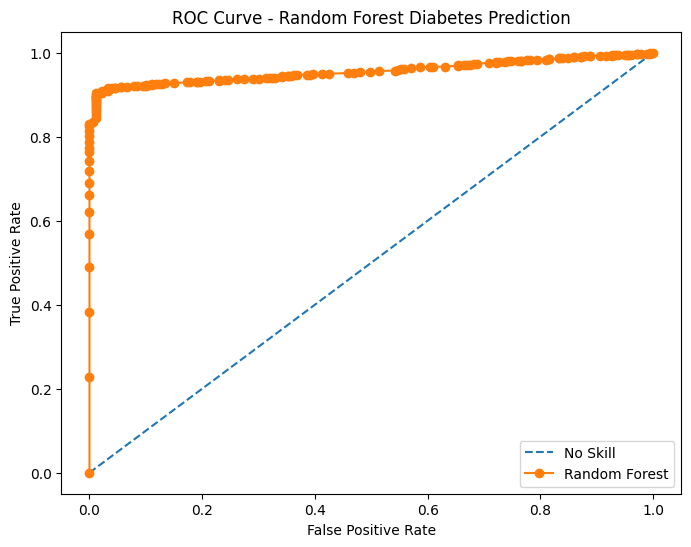

In [6]:
# ============================================
# ROC CURVE - RANDOM FOREST (NO GRID)
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder


# Load dataset
data = pd.read_csv("ML470_S5_Diabetes_Cleaned_Data_Concept.csv")

target_col = "target"

feature_cols = [
    "Fasting Blood Sugar Level",
    "BMI",
    "HbA1c Level",
    "Age",
    "Family History of Diabetes",
    "Physical Activity Level",
    "Dietary Habits",
    "BP_Upper value",
    "BP_Lower value",
    "Cholesterol Levels",
    "Medications Used",
    "Number of Doctor Visits",
    "Stress Level",
    "Hours of Sleep",
    "Comorbidities",
    "Geographical Location",
    "Insurance Coverage",
    "Lab Test Frequency",
    "Recent Hospitalization"
]

X = data[feature_cols]
y = data[target_col]


# Encode categorical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))


# Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)

# Stratified K-Fold (required for ROC)
cv = StratifiedKFold(
    n_splits=10,
    shuffle=True,
    random_state=42
)

# Probability predictions
y_prob = cross_val_predict(
    rf_model,
    X,
    y,
    cv=cv,
    method="predict_proba"
)[:, 1]


# ROC metrics
fpr, tpr, thresholds = roc_curve(y, y_prob)
auc_score = roc_auc_score(y, y_prob)

print("AUC Score:", auc_score)


# Plot ROC Curve (NO GRID)
plt.figure(figsize=(8, 6))

# No Skill baseline
plt.plot([0, 1], [0, 1], '--', label="No Skill")

# Random Forest ROC
plt.plot(fpr, tpr, marker='o', label="Random Forest")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Diabetes Prediction")

plt.legend(loc="lower right")
plt.show()
